In [1]:
# ozone.csv를 전처리
# ozone2.csv로 저장
# Ozone 필드의 값이 NA인 레코드들을 평균값으로 입력
# Result 필드를 추가하여 ozone의 평균값 이상이면 1, 미만이면 0으로 저장
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone2.csv")

# 데이터의 컬럼명 변경
print(df.head())

      Ozone  Result     Solar.R  Wind  Temp  Month  Day
0  41.00000       0  190.000000   7.4    67      5    1
1  36.00000       0  118.000000   8.0    72      5    2
2  12.00000       0  149.000000  12.6    74      5    3
3  18.00000       0  313.000000  11.5    62      5    4
4  42.12931       1  185.931507  14.3    56      5    5


In [3]:
df.columns

Index(['Ozone', 'Result', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

In [4]:
df.shape

(153, 7)

In [5]:
df.describe()

,Ozone,Result,Solar.R,Wind,Temp,Month,Day
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,0.529412,185.931507,9.957516,77.882353,6.993464,15.803922
std,28.693372,0.500773,87.960267,3.523001,9.465270,1.416522,8.864520
min,1.000000,0.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,21.000000,0.000000,120.000000,7.400000,72.000000,6.000000,8.000000
50%,42.129310,1.000000,194.000000,9.700000,79.000000,7.000000,16.000000
75%,46.000000,1.000000,256.000000,11.500000,85.000000,8.000000,23.000000
max,168.000000,1.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [6]:
# 오존량 분류를 기준으로 한 평균값들
df.groupby("Result").mean()

,Ozone,Solar.R,Wind,Temp,Month,Day
Result,,,,,,
0,20.902778,166.302702,11.270833,72.652778,6.972222,15.180556
1,60.997339,203.379334,8.790123,82.530864,7.012346,16.358025


Text(0, 0.5, '빈도')

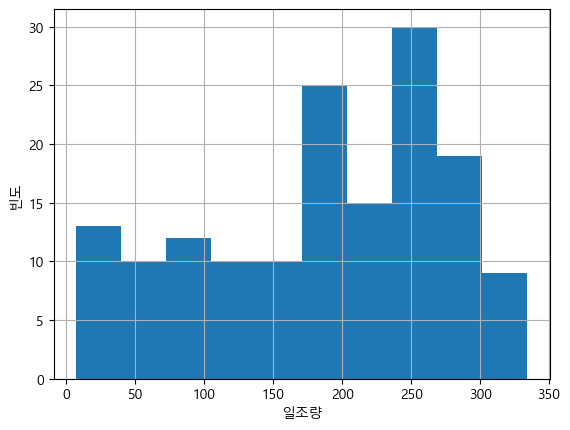

In [7]:
%matplotlib inline
df["Solar.R"].hist()
plt.xlabel('일조량')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

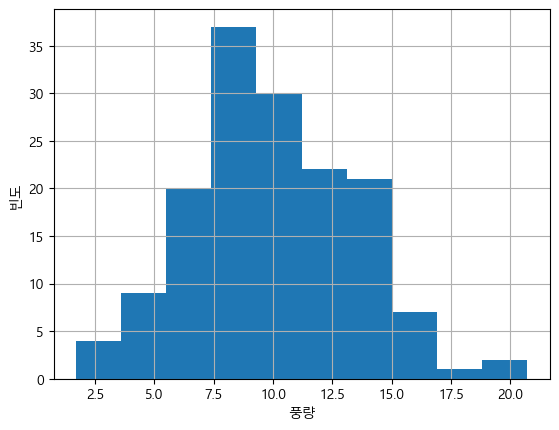

In [8]:
%matplotlib inline
df["Wind"].hist()
plt.xlabel('풍량')
plt.ylabel('빈도')

1    81
0    72
Name: Result, dtype: int64

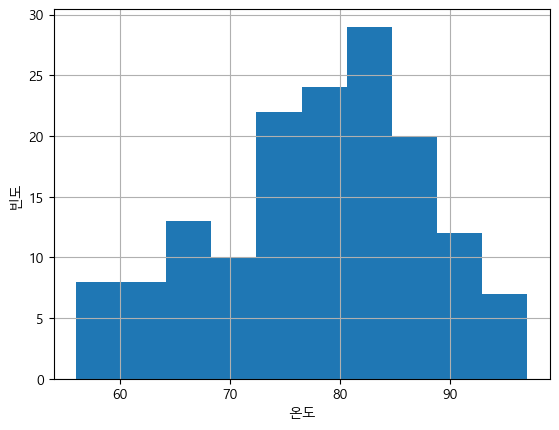

In [9]:
%matplotlib inline
df["Temp"].hist()
plt.xlabel('온도')
plt.ylabel('빈도')
df["Result"].value_counts()

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족 || 1: 정상)')

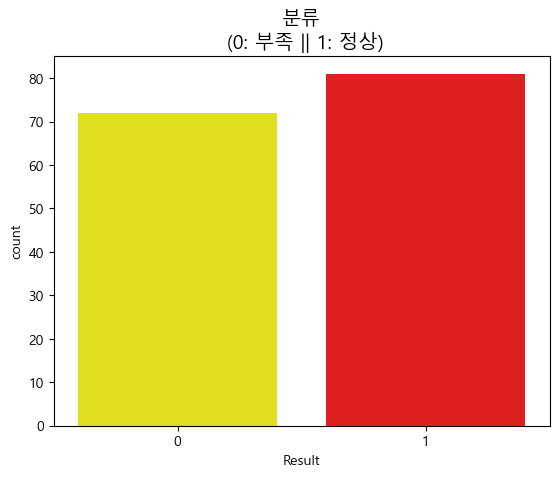

In [10]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족 || 1: 정상)', fontsize=14)
# 불균형 데이터셋

In [30]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2["Result"].value_counts()

0    72
1    72
Name: Result, dtype: int64

In [20]:
# 오버샘플링
from imblearn.over_sampling import SMOTE
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']
X_sample,y_sample = SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2["Result"].value_counts()

0    81
1    81
Name: Result, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51313 (\N{HANGUL SYLLABLE JOG}) missing from current font.


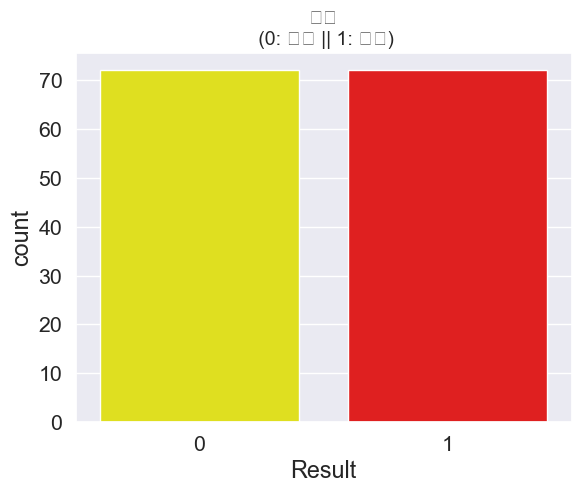

In [31]:
import seaborn as sns
colors = ["yellow", "red"]
sns.countplot('Result', data=df2, palette=colors)
plt.title('분류\n (0: 부족 || 1: 정상)', fontsize=14)
cols=['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']

In [32]:
import statsmodels.api as sm

# 특정한 변수에서 값의 비율이 너무 낮은 경우 에러가 발생할 수 있음
# model=sm.Logit(y,X,method='bfgs')
model = sm.Logit(y,X)
result = model.fit()

# summary()에 표현되지 않는 값이 있을 경우 summary2() 사용
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.568545
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  144
Model:                          Logit   Df Residuals:                      141
Method:                           MLE   Df Model:                            2
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.1798
Time:                        15:12:18   Log-Likelihood:                -81.870
converged:                       True   LL-Null:                       -99.813
Covariance Type:            nonrobust   LLR p-value:                 1.613e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.0031      0.002      1.399      0.162      -0.001       0.008
Wind          -0.2862      0.

In [33]:
# pvalue가 0.05보다 큰 값들을 제거
cols=['Wind', 'Temp']
X=X_samp[cols]
y=y_samp['Result']
df2=pd.concat([X,y],axis=1)

In [34]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.575467
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  144
Model:                          Logit   Df Residuals:                      142
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.1698
Time:                        15:12:23   Log-Likelihood:                -82.867
converged:                       True   LL-Null:                       -99.813
Covariance Type:            nonrobust   LLR p-value:                 5.826e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Wind          -0.2793      0.057     -4.902      0.000      -0.391      -0.168
Temp           0.0366      0.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.7739130434782608
검증용: 0.6896551724137931


In [36]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[ 8,  7],
       [ 2, 12]], dtype=int64)

In [37]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,8,7
1,2,12


<AxesSubplot:title={'center':'Confusion Matrix'}>

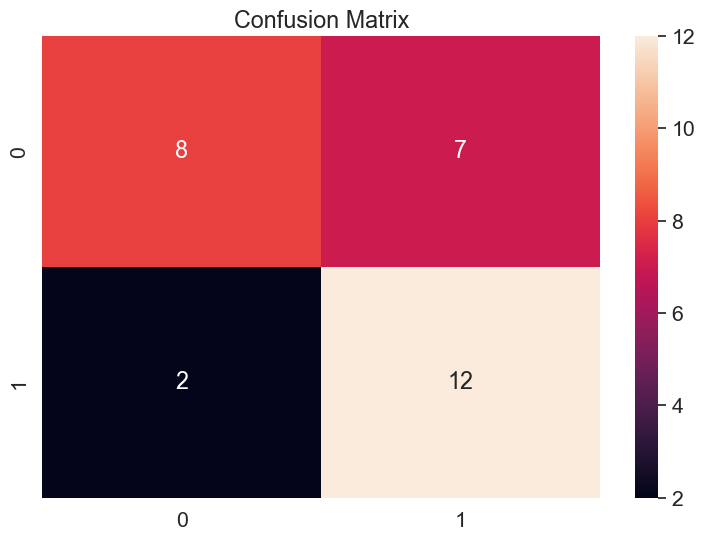

In [38]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자